In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('crime.csv', encoding= 'unicode_escape')

In [3]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
description = pd.read_csv('offense_codes.csv', encoding='latin_1')

In [5]:
description

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION
...,...,...
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION


In [9]:
#Let us drop useless columns:
## Note!!!! We firstly do not consider the particular areas, but we are talking over the whole Boston area. 
## Therefore, we remove the respective columns.

data.drop(['INCIDENT_NUMBER','OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'SHOOTING','YEAR','MONTH','DAY_OF_WEEK','HOUR','UCR_PART','Lat','Long','Location','STREET','DISTRICT', 'REPORTING_AREA'], axis = 1, inplace = True)

In [10]:
data.head()

,OFFENSE_CODE_GROUP,OCCURRED_ON_DATE
0,Larceny,2018-09-02 13:00:00
1,Vandalism,2018-08-21 00:00:00
2,Towed,2018-09-03 19:27:00
3,Investigate Property,2018-09-03 21:16:00
4,Investigate Property,2018-09-03 21:05:00


In [11]:
data['DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE']).dt.date

In [12]:
data.head()   #Here Date column's format is date-time.

,OFFENSE_CODE_GROUP,OCCURRED_ON_DATE,DATE
0,Larceny,2018-09-02 13:00:00,2018-09-02
1,Vandalism,2018-08-21 00:00:00,2018-08-21
2,Towed,2018-09-03 19:27:00,2018-09-03
3,Investigate Property,2018-09-03 21:16:00,2018-09-03
4,Investigate Property,2018-09-03 21:05:00,2018-09-03


In [15]:
data.drop(['OCCURRED_ON_DATE'], axis=1, inplace=True)

In [16]:
data.head()

,OFFENSE_CODE_GROUP,DATE
0,Larceny,2018-09-02
1,Vandalism,2018-08-21
2,Towed,2018-09-03
3,Investigate Property,2018-09-03
4,Investigate Property,2018-09-03


In [17]:
data.shape

(319073, 2)

In [19]:
data.dtypes

OFFENSE_CODE_GROUP    object
DATE                  object
dtype: object

In [22]:
len(data['OFFENSE_CODE_GROUP'].unique())

67

In [28]:
# Sorting by increasing order of date:

data = data.sort_values(by=['DATE'])

In [29]:
data

,OFFENSE_CODE_GROUP,DATE
318551,Motor Vehicle Accident Response,2015-06-15
318586,Fraud,2015-06-15
318585,Violations,2015-06-15
318584,License Plate Related Incidents,2015-06-15
318581,Warrant Arrests,2015-06-15
...,...,...
123,Medical Assistance,2018-09-03
121,Residential Burglary,2018-09-03
119,Firearm Violations,2018-09-03
132,Medical Assistance,2018-09-03


In [37]:
# Total number of dates in our dataset:

len(data['DATE'].unique())

1177

In [38]:
#Total number of actual dates that exist between the time frame:

dates = pd.date_range('2015-06-15','2018-09-03',freq='d')

In [40]:
len(dates)

1177

In [41]:
#As we have occurences in all the dates, there is no need to insert 0's in between.

In [42]:
#We now sum the total number of occurances:

data = pd.pivot_table(data, index=['DATE'], aggfunc='count')

In [47]:
data

,OFFENSE_CODE_GROUP
DATE,
2015-06-15,249
2015-06-16,249
2015-06-17,234
2015-06-18,294
2015-06-19,289
...,...
2018-08-30,257
2018-08-31,269
2018-09-01,264


In [48]:
# We can now use LSTM model to predict Time Series:



In [49]:
import matplotlib.pyplot as plt

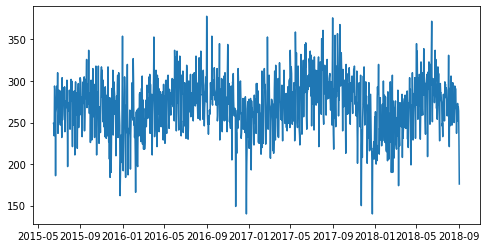

In [53]:
plt.figure(figsize=(8,4))

plt.plot(data)
plt.show()

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [56]:
np.random.seed(7)

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [59]:
dataset

array([[0.45798319],
       [0.45798319],
       [0.39495798],
       ...,
       [0.5210084 ],
       [0.36554622],
       [0.1512605 ]])

In [60]:

# split into train and test sets


train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

941 236


In [65]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [66]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [72]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [80]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0383
Epoch 2/100
 - 1s - loss: 0.0172
Epoch 3/100
 - 1s - loss: 0.0172
Epoch 4/100
 - 1s - loss: 0.0172
Epoch 5/100
 - 1s - loss: 0.0172
Epoch 6/100
 - 1s - loss: 0.0172
Epoch 7/100
 - 1s - loss: 0.0172
Epoch 8/100
 - 1s - loss: 0.0172
Epoch 9/100
 - 1s - loss: 0.0172
Epoch 10/100
 - 1s - loss: 0.0172
Epoch 11/100
 - 1s - loss: 0.0173
Epoch 12/100
 - 1s - loss: 0.0172
Epoch 13/100
 - 1s - loss: 0.0172
Epoch 14/100
 - 1s - loss: 0.0171
Epoch 15/100
 - 1s - loss: 0.0172
Epoch 16/100
 - 1s - loss: 0.0171
Epoch 17/100
 - 1s - loss: 0.0172
Epoch 18/100
 - 1s - loss: 0.0171
Epoch 19/100
 - 1s - loss: 0.0172
Epoch 20/100
 - 1s - loss: 0.0170
Epoch 21/100
 - 1s - loss: 0.0172
Epoch 22/100
 - 1s - loss: 0.0172
Epoch 23/100
 - 1s - loss: 0.0170
Epoch 24/100
 - 1s - loss: 0.0171
Epoch 25/100
 - 1s - loss: 0.0172
Epoch 26/100
 - 1s - loss: 0.0171
Epoch 27/100
 - 1s - loss: 0.0173
Epoch 28/100
 - 1s - loss: 0.0171
Epoch 29/

In [81]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [83]:
import math
# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 31.05 RMSE
Test Score: 30.04 RMSE


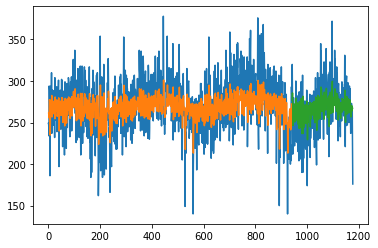

In [87]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()